In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             confusion_matrix, 
                             precision_recall_curve, roc_curve, auc)
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

### Question 1
Import the data from `assets/fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [2]:
def answer_one():
    df = pd.read_csv('../assets/fraud_data.csv')
    
    fraud = df[df['Class'] != 0]
    
    return len(fraud) / len(df)

In [3]:
answer_one()

0.016410823768035772

In [4]:
df = pd.read_csv('../assets/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [5]:
def answer_two():
    dummy_clf = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
    predict = dummy_clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, predict)
    recall = recall_score(y_test, predict)
    
    return (accuracy, recall)

In [6]:
answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [7]:
def answer_three():
    svm = SVC().fit(X_train, y_train)
    predict = svm.predict(X_test)
    
    accuracy = accuracy_score(y_test, predict)
    recall = recall_score(y_test, predict)
    precision = precision_score(y_test, predict)
    
    return (accuracy, recall, precision)

In [8]:
answer_three()

(0.9900442477876106, 0.35, 0.9333333333333333)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [9]:
def answer_four():
    svm = SVC(C=1e9, gamma=1e-07).fit(X_train, y_train)
    predict = svm.decision_function(X_test) > -220
    
    return confusion_matrix(y_test, predict)

In [10]:
answer_four()

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [11]:
lr = LogisticRegression().fit(X_train, y_train)
predict = lr.predict(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, predict)

closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

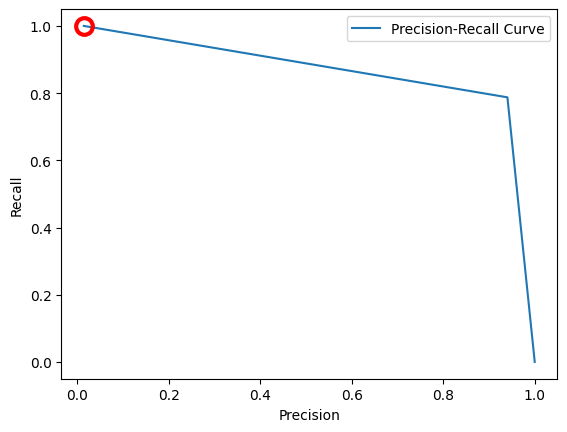

In [12]:
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [13]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, predict)
roc_auc_lr = auc(fpr_lr, tpr_lr)

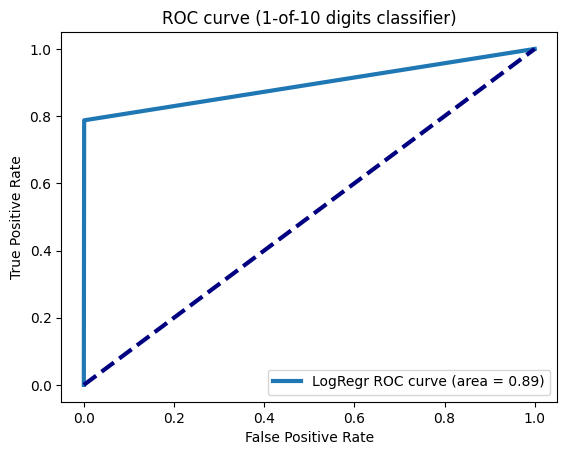

In [14]:
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve (1-of-10 digits classifier)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.show()

In [15]:
def answer_five():
    return (0.83, 0.94)

In [16]:
answer_five()

(0.83, 0.94)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation. (Suggest to use `solver='liblinear'`, more explanation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html))

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|

<br>

*This function should return a 4 by 2 numpy array with 8 floats.* 

*Note: do not return a DataFrame, just the values denoted by `?` in a numpy array.*

In [17]:
def answer_six():    
    lr = LogisticRegression(solver='liblinear')
    grid_values = {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10]}
    
    grid_clf_rec = GridSearchCV(lr, param_grid=grid_values, scoring='recall')
    grid_clf_rec.fit(X_train, y_train)
    
    res = np.array(grid_clf_rec.cv_results_['mean_test_score'])
    
    return res.reshape(4, 2)

In [18]:
answer_six()

array([[0.69558442, 0.77168831],
       [0.80792208, 0.81155844],
       [0.80428571, 0.81149351],
       [0.80064935, 0.80064935]])

In [19]:
def GridSearch_Heatmap(scores):
    plt.figure()
    sns.heatmap(scores.reshape(4,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10])
    plt.yticks(rotation=0);

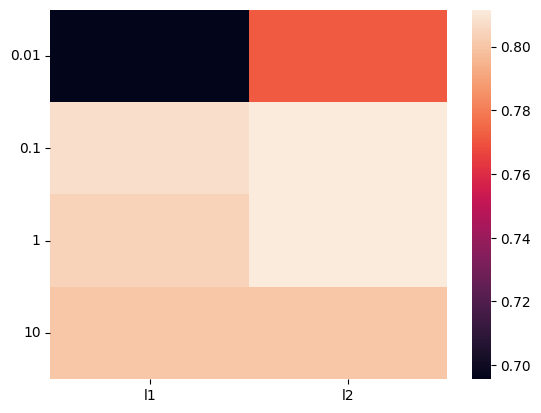

In [20]:
GridSearch_Heatmap(answer_six())